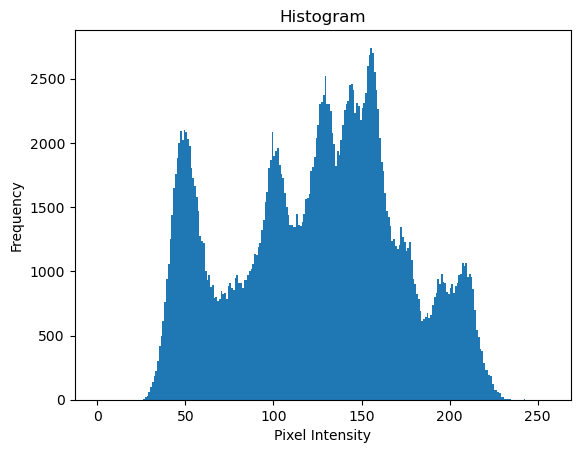

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw

# 1. Generate a Binary Image (Threshold at 128)
def binarize_image(image_path, threshold=128):
    # Load the image in grayscale mode
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Apply binary thresholding
    _, binary_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    # Save the binary image
    cv2.imwrite('binary_image.bmp', binary_image)
    return binary_image

# 2. Generate a Histogram
def generate_histogram(image_path):
    # Load the image in grayscale mode
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Compute the histogram
    plt.hist(image.ravel(), bins=256, range=[0,256])
    plt.title('Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.savefig('histogram.png')
    plt.show()

# 3. Identify Connected Components
def connected_components(image):
    # Find connected components
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(image, connectivity=8)
    # Convert to color image to visualize
    output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    for i in range(1, num_labels):  # Skip the background label 0
        x, y, w, h, area = stats[i]
        cx, cy = centroids[i]
        
        # Draw bounding box
        cv2.rectangle(output_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        # Draw centroid
        cv2.drawMarker(output_image, (int(cx), int(cy)), (0, 0, 255), markerType=cv2.MARKER_CROSS, thickness=2)

    # Save the connected components image
    cv2.imwrite('connected_components.bmp', output_image)

# Load the lena.bmp image and process it
image_path = './lena.bmp'

# Part (a): Generate a binary image
binary_image = binarize_image(image_path)

# Part (b): Generate a histogram
generate_histogram(image_path)

# Part (c): Identify connected components
connected_components(binary_image)